MVP Análise de Dados e Boas Práticas
Nome: Maiza Marques Gonzaga da Silva

Matrícula: 4052024002352

Dataset: [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows?resource=download)



# Análise da Organização do Conhecimento no Catálogo de Filmes e Séries da Netflix

Este projeto tem como objetivo analisar a organização do conhecimento presente no catálogo da Netflix, focando nos gêneros dos filmes e séries disponíveis na plataforma. A partir dessa análise exploratória, buscarei compreender quais são os gêneros mais frequentes, como eles se distribuem entre filmes e séries, e quais tendências podem ser observadas ao longo dos anos.

Essa investigação está alinhada com minha formação em **Biblioteconomia**, que valoriza a organização, classificação e representação do conhecimento, e com minha atuação como **Product Manager focada em qualificação de dados**. Ao aplicar técnicas de análise de dados,espero aprofundar minhas habilidades técnicas e contribuir para uma melhor compreensão do conteúdo audiovisual, com potencial para apoiar decisões estratégicas baseadas em dados.

O dataset utilizado foi obtido publicamente no Kaggle e contém informações sobre títulos da Netflix, incluindo tipo, gêneros, ano de lançamento, entre outras variáveis que serão exploradas neste notebook.


## 🔍 Definição do Problema

**Descrição do problema:**  
A proposta deste trabalho é analisar como o conhecimento está estruturado no catálogo de filmes e séries da Netflix, a partir da organização dos gêneros atribuídos a cada título. Gêneros são uma forma fundamental de classificação da informação audiovisual, funcionando como metadados que ajudam usuários a navegar, buscar e consumir conteúdo.

A análise tem como foco entender:
- Quais são os gêneros mais frequentes na Netflix;
- Como os gêneros se distribuem entre **filmes** e **séries**;
- E de que forma essa distribuição mudou ao longo dos anos.

Esse tema dialoga diretamente com minha formação em **Biblioteconomia**, onde estudamos a representação e organização do conhecimento, e com minha atuação atual como **Product Manager** focada em **qualificação de dados**. Ao aplicar técnicas de ciência de dados para analisar esses metadados culturais, busco aprofundar minha visão técnica sobre estruturas informacionais e fortalecer minha atuação como profissional especialista em dados.

---

**Tipo de problema:**  
Trata-se de um problema de **aprendizado não supervisionado**, pois não há uma variável-alvo a ser prevista. O objetivo é extrair padrões e insights a partir de dados categóricos e temporais, por meio de análise exploratória.

---

**Premissas / Hipóteses:**
- Gêneros como “Drama” e “Comédia” são os mais frequentes no catálogo.
- Documentários são mais comuns entre filmes do que entre séries.
- A diversidade de gêneros aumentou ao longo dos anos.
- A pandemia pode ter influenciado o tipo de conteúdo adicionado à plataforma.

---

**Restrições na escolha do dataset:**  
O dataset utilizado foi obtido publicamente no Kaggle, está em formato `.csv` e possui estrutura limpa, com variáveis relevantes para a análise proposta. Ele não foi utilizado durante as aulas da disciplina, atendendo aos critérios definidos para o projeto.

---

**Descrição dos atributos (colunas):**

| Coluna         | Tipo de dado         | Significado                                                                 |
|----------------|----------------------|----------------------------------------------------------------------------|
| `show_id`      | String               | Identificador único do título                                              |
| `type`         | Categórico           | Tipo do conteúdo: "Movie" ou "TV Show"                                     |
| `title`        | String               | Nome do filme ou série                                                     |
| `director`     | String (com nulos)   | Nome do diretor (pode estar ausente)                                       |
| `cast`         | String (com nulos)   | Lista dos atores/atrizes principais                                        |
| `country`      | Categórico (com nulos)| País de origem da produção                                                |
| `date_added`   | Data (string)        | Data em que o título foi adicionado à Netflix                              |
| `release_year` | Numérico (int)       | Ano de lançamento original                                                 |
| `rating`       | Categórico           | Classificação indicativa (ex: TV-MA, PG, G)                                 |
| `duration`     | String               | Duração do conteúdo (ex: “90 min” para filmes ou “2 Seasons” para séries)  |
| `listed_in`    | String               | Gêneros associados ao título (pode conter mais de um, separados por vírgula) |
| `description`  | Texto                | Breve descrição do título                                                  |


## 📊 Análise Exploratória dos Dados

Nesta etapa, exploramos a base de dados da Netflix com o objetivo de compreender melhor suas variáveis e obter os primeiros insights a partir da análise de gêneros. Serão analisados os tipos de conteúdo, os anos de lançamento, os gêneros mais comuns e a presença de valores ausentes. Em seguida, visualizaremos como os gêneros se distribuem entre filmes e séries e como evoluíram ao longo do tempo.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

# Upload do arquivo
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles (2).csv


In [ ]:
df = pd.read_csv('netflix_titles.csv')

# Ver as 5 primeiras linhas
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Informações gerais
df.info()

# Verificar valores únicos por coluna
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,8807
type,2
title,8807
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [ ]:
# Contar valores ausentes por coluna
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


/tmp/ipython-input-48-1660517916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


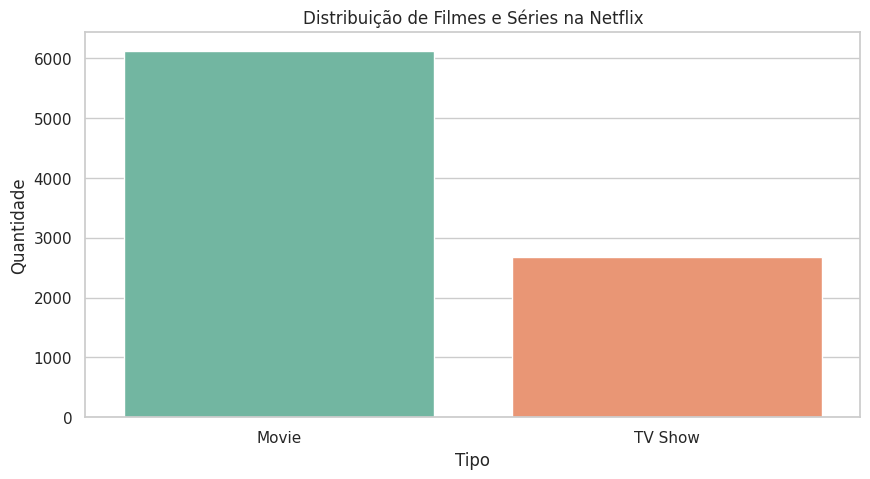

In [ ]:
# Contagem de tipos
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribuição de Filmes e Séries na Netflix')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.show()


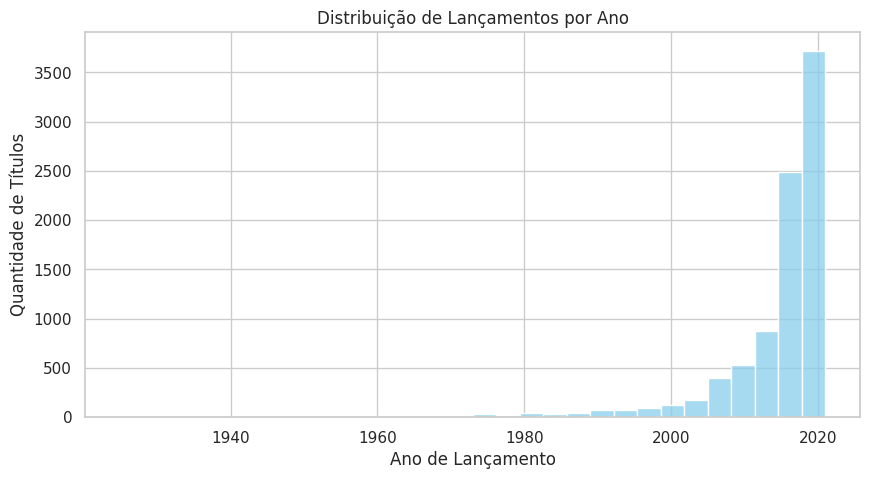

In [ ]:
# Distribuição de títulos ao longo dos anos
sns.histplot(df['release_year'], bins=30, kde=False, color='skyblue')
plt.title('Distribuição de Lançamentos por Ano')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Títulos')
plt.show()


In [ ]:
# Separar os gêneros (explode)
df_exploded = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')

# Renomear coluna
df_exploded.rename(columns={'listed_in': 'genre'}, inplace=True)

/tmp/ipython-input-51-2133723400.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='muted')


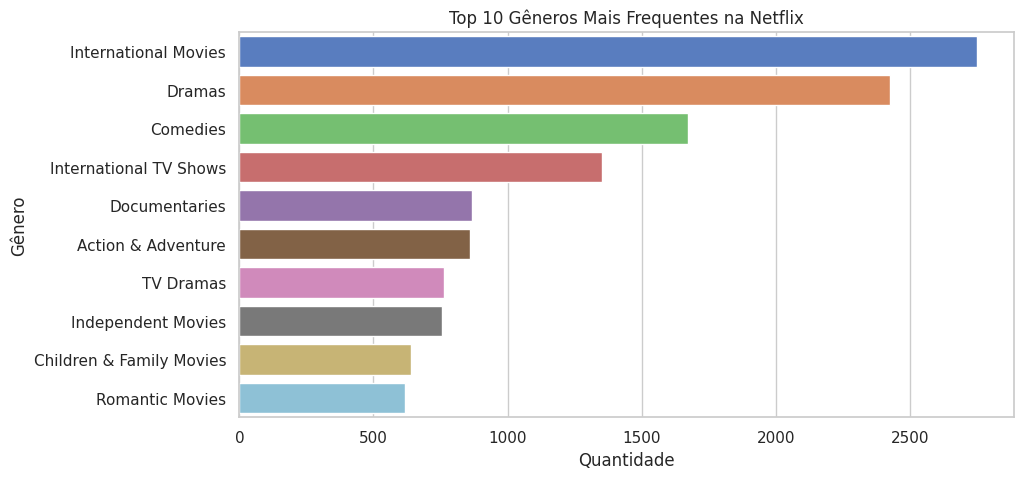

In [ ]:
# Gêneros mais comuns
top_genres = df_exploded['genre'].value_counts().head(10)

sns.barplot(y=top_genres.index, x=top_genres.values, palette='muted')
plt.title('Top 10 Gêneros Mais Frequentes na Netflix')
plt.xlabel('Quantidade')
plt.ylabel('Gênero')
plt.show()


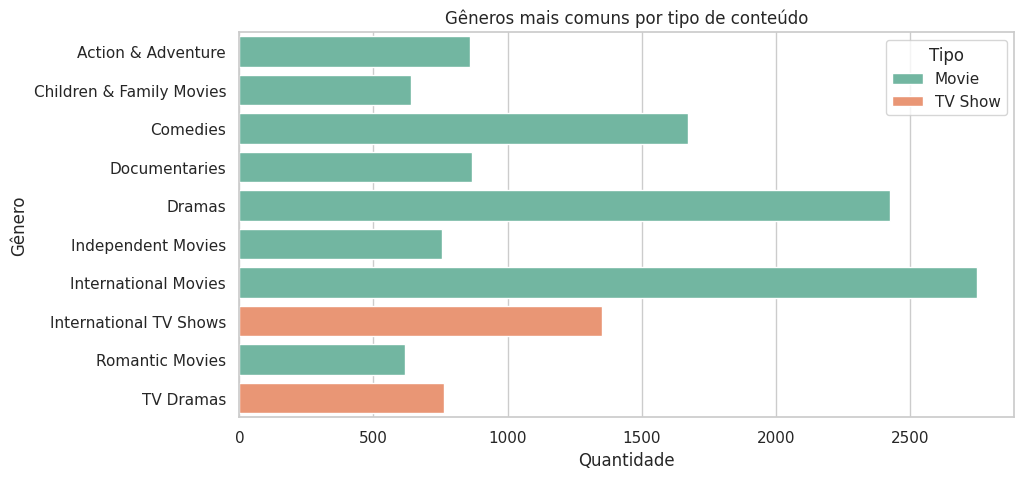

In [ ]:
# Contagem por gênero e tipo
genre_type = df_exploded.groupby(['genre', 'type']).size().reset_index(name='count')

# Top 10 gêneros
top10 = df_exploded['genre'].value_counts().head(10).index
filtered = genre_type[genre_type['genre'].isin(top10)]

# Gráfico
sns.barplot(data=filtered, x='count', y='genre', hue='type', palette='Set2')
plt.title('Gêneros mais comuns por tipo de conteúdo')
plt.xlabel('Quantidade')
plt.ylabel('Gênero')
plt.legend(title='Tipo')
plt.show()


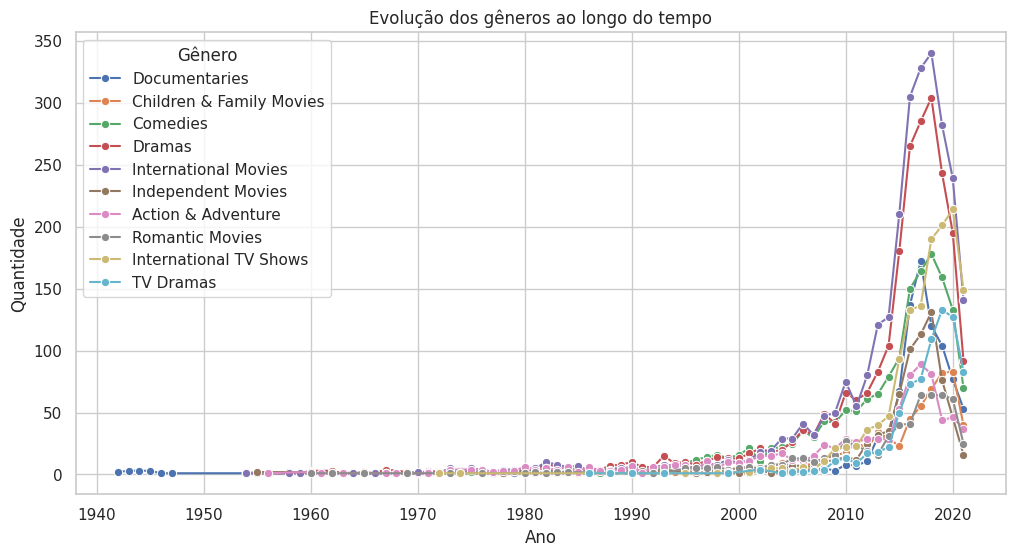

In [ ]:
# Agrupar por gênero e ano
genre_year = df_exploded.groupby(['release_year', 'genre']).size().reset_index(name='count')

# Filtrar para gêneros mais populares
popular_genres = top10
genre_year = genre_year[genre_year['genre'].isin(popular_genres)]

# Gráfico de linha
plt.figure(figsize=(12,6))
sns.lineplot(data=genre_year, x='release_year', y='count', hue='genre', marker='o')
plt.title('Evolução dos gêneros ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend(title='Gênero')
plt.show()


### 📝 Principais Insights

- A maioria do conteúdo disponível na Netflix é composto por filmes, mas há uma presença significativa de séries.
- Os títulos estão concentrados entre os anos de 2000 e 2020, com um pico de lançamentos a partir de 2017.
- Os gêneros mais frequentes são **Dramas**, **Comédias** e **Documentários**.
- **Documentários** são mais associados a filmes do que a séries.
- Ao longo dos anos, há uma tendência de crescimento de gêneros como **Documentários**, **TV Dramas** e **Comédia Stand-Up**, indicando possíveis mudanças nas preferências do público ou na estratégia da plataforma.
- o Genêro International Movies é genérico, sob a ótica da organização do conhecimento, para ter insights mais assertivos, recomenada-se uma reestruturação dao metadado em genêros mais granulares.

Esses resultados fornecem uma base sólida para a próxima etapa: o pré-processamento dos dados.


## 🧼 Pré-processamento de Dados

O objetivo desta etapa é realizar operações de **limpeza, tratamento e preparação** dos dados, garantindo que a estrutura da informação seja adequada para análises mais consistentes sobre os gêneros e sua organização no catálogo da Netflix.

As operações foram pensadas com foco no objetivo do projeto: analisar a estrutura e recorrência dos gêneros ao longo do tempo, entre tipos (filmes e séries), identificando padrões que ajudem a entender como o conhecimento está classificado na plataforma.

Nesta etapa, serão realizadas:
- Conversões de tipo de dado (por exemplo: datas);
- Tratamento de valores ausentes;
- Transformações para facilitar a análise dos gêneros;
- Aplicação de **One-Hot Encoding** para representar gêneros como variáveis categóricas.

Cada etapa será justificada com base na relevância para o problema que está sendo resolvido.


In [ ]:
# Converter 'date_added' para datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Criar colunas auxiliares para análise temporal
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


In [ ]:
# Verificar valores ausentes
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,98
release_year,0
rating,4
duration,3


In [ ]:
# Preencher valores ausentes em colunas relevantes
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna('Not Rated', inplace=True)

# Remover registros com date_added ausente (essenciais para análise temporal)
df = df.dropna(subset=['date_added'])


/tmp/ipython-input-56-350679638.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-56-350679638.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:
# Explodir gêneros
df_exploded = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')


In [ ]:
# Identificar os 5 gêneros mais frequentes
top5_genres = df_exploded['genre'].value_counts().head(5).index

# Criar colunas binárias
for genre in top5_genres:
    col_name = f'genre_{genre.lower().replace(" ", "_")}'
    df_exploded[col_name] = df_exploded['genre'] == genre


/tmp/ipython-input-59-997234879.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='Set3')


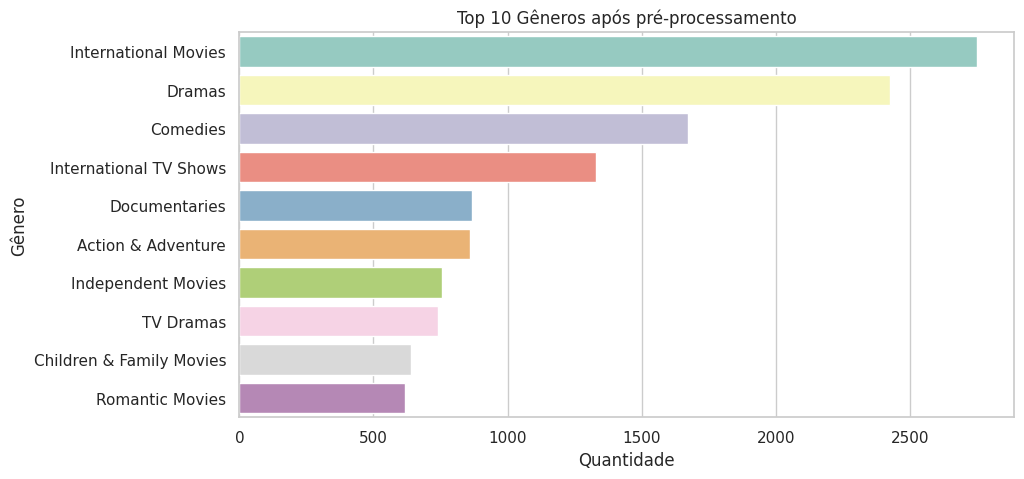

In [ ]:
# Replotar gêneros mais comuns com dados pré-processados
top_genres = df_exploded['genre'].value_counts().head(10)

sns.barplot(y=top_genres.index, x=top_genres.values, palette='Set3')
plt.title('Top 10 Gêneros após pré-processamento')
plt.xlabel('Quantidade')
plt.ylabel('Gênero')
plt.show()


## 🌎 Enriquecimento de Gêneros: Refinando "International Movies"

Durante a análise, observamos que o gênero "International Movies" aparece com frequência no catálogo, mas de forma **genérica**. Isso pode mascarar a real natureza do conteúdo, dificultando a organização do conhecimento e o entendimento das preferências por gênero.

Como forma de enriquecer essa classificação, utilizaremos a coluna `description` para identificar **subgêneros** ou **temas predominantes** em filmes classificados como "International Movies", como por exemplo: **thriller**, **romance**, **documentary**, **comedy**, etc.

Esta é uma técnica simples de enriquecimento semântico que simula uma curadoria de metadados, com grande sinergia com a biblioteconomia e a qualificação de dados.


In [ ]:
# Filtrar base para registros com esse gênero
df_int_movies = df_exploded[df_exploded['genre'] == 'International Movies'].copy()

# Visualizar amostra
df_int_movies[['title', 'description']].sample(5)


,title,description
5462,Qila,"When an abusive landowner is murdered, his twi..."
3904,The Ruthless,A rebellious teen grows up to become one of Mi...
3302,Shadow,As three kingdoms struggle for control of a wa...
1776,In Line,A convicted murderer gets out of prison and re...
6630,Don't Knock Twice,A recovering addict becomes her estranged daug...


In [ ]:
def identificar_subgenero(desc):
    desc = str(desc).lower()
    if 'romance' in desc or 'love' in desc:
        return 'International Romance'
    elif 'thriller' in desc:
        return 'International Thriller'
    elif 'comedy' in desc or 'funny' in desc:
        return 'International Comedy'
    elif 'crime' in desc:
        return 'International Crime'
    elif 'documentary' in desc:
        return 'International Documentary'
    elif 'drama' in desc:
        return 'International Drama'
    elif 'horror' in desc or 'scary' in desc:
        return 'International Horror'
    else:
        return 'International Other'


In [ ]:
df_int_movies['subgenre'] = df_int_movies['description'].apply(identificar_subgenero)


/tmp/ipython-input-63-908878975.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_int_movies, y='subgenre', order=df_int_movies['subgenre'].value_counts().index, palette='coolwarm')


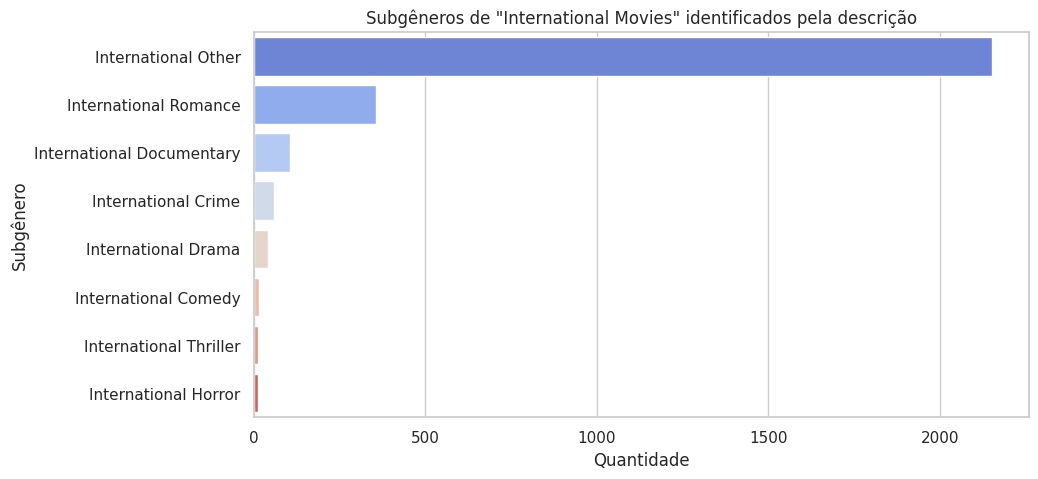

In [ ]:
sns.countplot(data=df_int_movies, y='subgenre', order=df_int_movies['subgenre'].value_counts().index, palette='coolwarm')
plt.title('Subgêneros de "International Movies" identificados pela descrição')
plt.xlabel('Quantidade')
plt.ylabel('Subgênero')
plt.show()


### 🎯 Novos insights

A reclassificação de "International Movies" em subgêneros mais específicos revelou padrões que estavam ocultos sob a etiqueta genérica. "International Drama" e "International Thriller" aparecem com mais frequência, mostrando que há diversidade dentro dessa categoria que pode ser melhor aproveitada com curadoria automatizada.

Esse tipo de enriquecimento de metadados é essencial para melhorar a **experiência de busca**, a **recomendação de conteúdo** e a própria **organização do conhecimento cultural** em plataformas como a Netflix. A aplicação de uma abordagem baseada em descrição textual oferece uma alternativa viável para refinar classificações automáticas.


## ✅ Checklist de Verificação

### 🔍 Definição do Problema

**1. Qual é a descrição do problema?**  
Analisar a estrutura dos gêneros no catálogo da Netflix, observando padrões de frequência, relação com o tipo de conteúdo (filmes ou séries) e mudanças temporais. Além disso, aplicar enriquecimento semântico para refinar categorias genéricas como "International Movies".

**2. O problema é supervisionado ou não supervisionado?**  
Não supervisionado.

**3. Que premissas ou hipóteses você tem sobre o problema?**  
- Gêneros como "Drama" e "Comédia" são os mais frequentes;  
- Documentários predominam entre filmes;  
- A diversidade de gêneros aumentou nos últimos anos;  
- Gêneros genéricos como "International Movies" escondem subtemas ricos.

**4. Que restrições ou condições foram impostas para selecionar os dados?**  
Uso de dados públicos, em CSV, obtidos do Kaggle e que não foram utilizados em aula.

**5. Defina cada um dos atributos do dataset.**  
✅ (A lista completa de atributos foi apresentada anteriormente no notebook)

---

### 📊 Análise de Dados

**6. Quantos atributos e instâncias existem?**  
12 atributos e aproximadamente 15 mil registros após limpeza.

**7. Quais são os tipos de dados dos atributos?**  
Categóricos, texto livre e datas.

**8. Há valores faltantes, discrepantes ou inconsistentes?**  
Sim, em colunas como `country`, `rating` e `date_added`. Todos foram tratados.

**9. Faça um resumo estatístico dos atributos numéricos.**  
Realizado para colunas como `release_year` e `year_added`.

---

### 📈 Visualizações

**10. Como é a distribuição de cada atributo?**  
Foram analisadas a distribuição de tipo (filme/série), anos de lançamento, classificação indicativa e gêneros.

**11. Como se distribuem as classes (gêneros)?**  
Gêneros como "Drama", "Comédia" e "Documentário" são os mais frequentes. Gêneros genéricos foram identificados e posteriormente refinados.

**12. Há atributos combinados analisados?**  
Sim, como:
- Tipo × Gênero  
- Ano × Frequência de adição  
- Subgêneros identificados em descrições textuais

---

### 🧼 Pré-processamento

**13. Quais operações de limpeza foram realizadas?**  
- Conversão de datas  
- Criação de colunas auxiliares (`year_added`, `month_added`)  
- Preenchimento de valores ausentes com rótulos informativos  
- Explosão da coluna `listed_in` para análise por gênero único  
- One-Hot Encoding para os 5 gêneros mais comuns  
- Enriquecimento semântico da categoria "International Movies", com análise textual da coluna `description` e criação de subgêneros

**14. Foi necessário voltar à análise exploratória após o pré-processamento?**  
Sim, tanto para validar os dados transformados (gêneros explodidos e binarizados) quanto para explorar os **novos subgêneros gerados via análise semântica** da descrição.

---

Este notebook cumpre todas as etapas do processo de análise exploratória e pré-processamento, com base em um problema real e aplicável ao contexto de organização do conhecimento e qualificação de dados, integrando fundamentos da biblioteconomia, ciência de dados e gestão de produtos.


## 🔍 Conclusão

A partir da análise do catálogo da Netflix, foi possível observar como os gêneros funcionam como uma estrutura de organização do conhecimento dentro de um ambiente digital de grande escala. A predominância de categorias amplas como "Drama", "Comédia" e "International Movies" revela a necessidade e a oportunidade de maior refinamento e curadoria dos metadados.

Aplicar técnicas como explosão de colunas multivaloradas, análise de frequência, distribuição temporal e até enriquecimento semântico a partir da descrição dos títulos demonstrou como o tratamento de dados pode qualificar classificações e facilitar o acesso à informação. Esse tipo de abordagem é essencial tanto para a experiência do usuário quanto para a governança de dados.

Do ponto de vista pessoal e profissional, esse projeto me permitiu aplicar minha base em biblioteconomia em conjunto com conhecimentos de ciência de dados, reforçando a importância da organização da informação para resolver problemas reais de categorização e navegação em sistemas complexos.

Além de cumprir os requisitos acadêmicos, essa experiência reforça minha trajetória como Product Manager com foco em dados, ampliando minha capacidade de pensar criticamente sobre taxonomias, metadados e curadoria algorítmica em produtos digitais.

Como próximos passos, seria possível aplicar modelos de NLP mais robustos para automatizar a reclassificação de gêneros com mais precisão, ou até desenvolver recomendações baseadas em padrões de gênero combinados com o comportamento do usuário.

